<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/kplr005449910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 5.5 MB/s 
     |████████████████████████████████| 41 kB 159 kB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 4.5 MB 40.1 MB/s 
     |████████████████████████████████| 832 kB 59.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.6 MB 29.6 MB/s 


# **Import**

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# The Source

In [4]:
source = lk.search_lightcurve("kplr005449910", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5156486614796,nan,nan,0,-1.309759e-03,143.16771,130.48918,34237,4.3712534e+05,1.6965593e+01,2.7246650e+03,7.9091722e-01,nan,nan,0,nan,nan,nan,nan,143.16771,3.9630428e-05,130.48918,3.7338348e-05,-2.4571290e-02,-4.2888809e-02
808.5360829029305,4.4726038e+05,1.7465700e+01,0,-1.309117e-03,143.16761,130.48919,34238,4.3714569e+05,1.6966013e+01,2.7243699e+03,7.9411769e-01,4.4726038e+05,1.7465700e+01,0,nan,nan,nan,nan,143.16761,3.9629769e-05,130.48919,3.7330570e-05,-2.4720952e-02,-4.2431485e-02
808.5565171446142,4.4721750e+05,1.7465874e+01,0,-1.308475e-03,143.16780,130.48927,34239,4.3709000e+05,1.6964951e+01,2.7221052e+03,7.9206699e-01,4.4721750e+05,1.7465874e+01,0,nan,nan,nan,nan,143.16780,3.9630897e-05,130.48927,3.7335343e-05,-2.4562331e-02,-4.2396612e-02
808.5769513865234,4.4723881e+05,1.7470160e+01,10000000000000,-1.307833e-03,143.16768,130.48947,34240,4.3711738e+05,1.6965443e+01,2.7249546e+03,7.9249156e-01,4.4723881e+05,1.7470160e+01,10000000000000,nan,nan,nan,nan,143.16768,3.9629140e-05,130.48947,3.7331713e-05,-2.4503475e-02,-4.1894898e-02
808.5973856286728,4.4726009e+05,1.7470278e+01,0,-1.307191e-03,143.16758,130.48940,34241,4.3714191e+05,1.6965780e+01,2.7236819e+03,7.9210865e-01,4.4726009e+05,1.7470278e+01,0,nan,nan,nan,nan,143.16758,3.9625342e-05,130.48940,3.7327809e-05,-2.4530850e-02,-4.1691594e-02
808.6178199711721,4.4731181e+05,1.7469320e+01,0,-1.306549e-03,143.16765,130.48960,34242,4.3718238e+05,1.6966478e+01,2.7252542e+03,7.9110026e-01,4.4731181e+05,1.7469320e+01,0,nan,nan,nan,nan,143.16765,3.9623199e-05,130.48960,3.7326357e-05,-2.4450973e-02,-4.1590579e-02
808.6382542138963,4.4727841e+05,1.7473585e+01,0,-1.305906e-03,143.16768,130.48965,34243,4.3715625e+05,1.6965971e+01,2.7217202e+03,7.9238760e-01,4.4727841e+05,1.7473585e+01,0,nan,nan,nan,nan,143.16768,3.9621922e-05,130.48965,3.7326845e-05,-2.4276320e-02,-4.1299101e-02
808.6586883567434,4.4724912e+05,1.7481916e+01,0,-1.305263e-03,143.16767,130.48969,34244,4.3712812e+05,1.6965420e+01,2.7231052e+03,7.9296154e-01,4.4724912e+05,1.7481916e+01,0,nan,nan,nan,nan,143.16767,3.9623072e-05,130.48969,3.7325306e-05,-2.4185853e-02,-4.0921755e-02


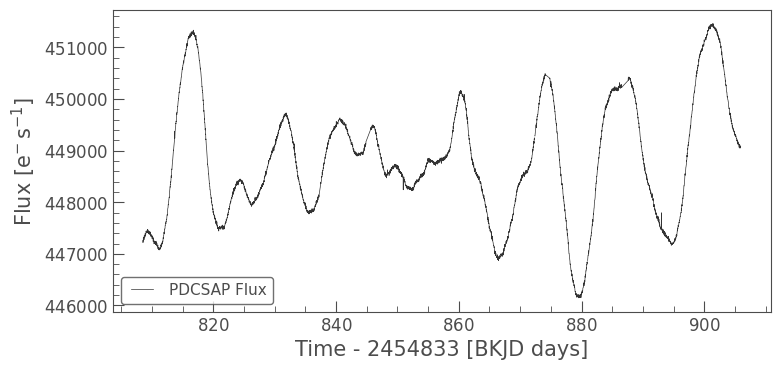

In [5]:
source.plot(label='PDCSAP Flux', normalize=False)

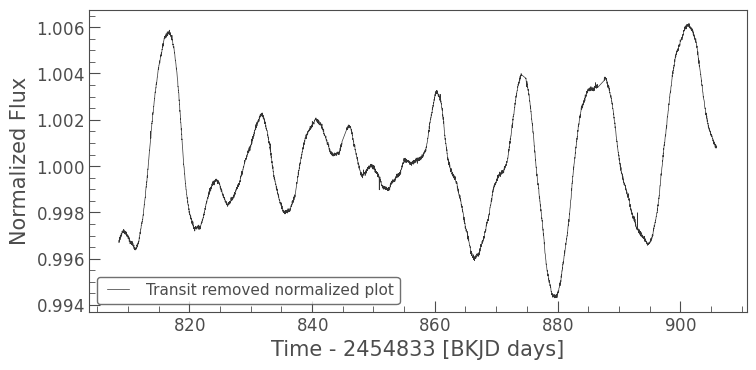

In [13]:
rem_out=source.remove_outliers(sigma_upper = 2.5).normalize()
rem_out.plot(label='Transit removed normalized plot', normalize = True)

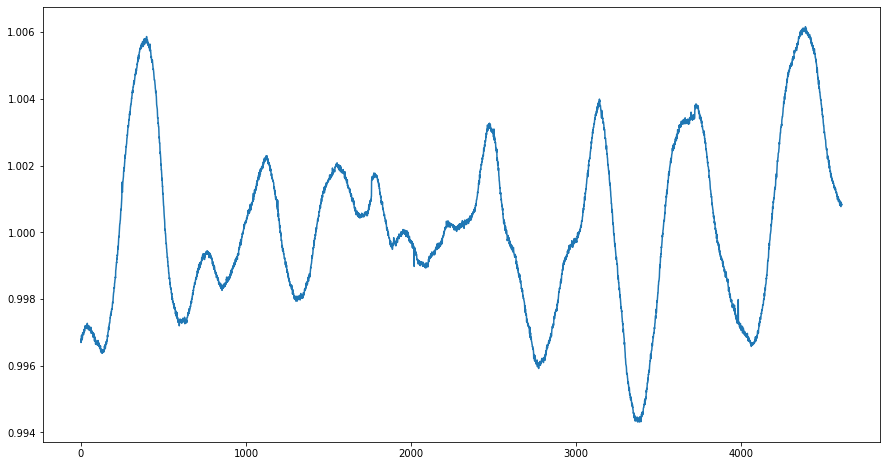

In [14]:
flux = rem_out.flux.value
time = rem_out.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [15]:
smoothed_signal = convolve(flux, Box1DKernel(16))

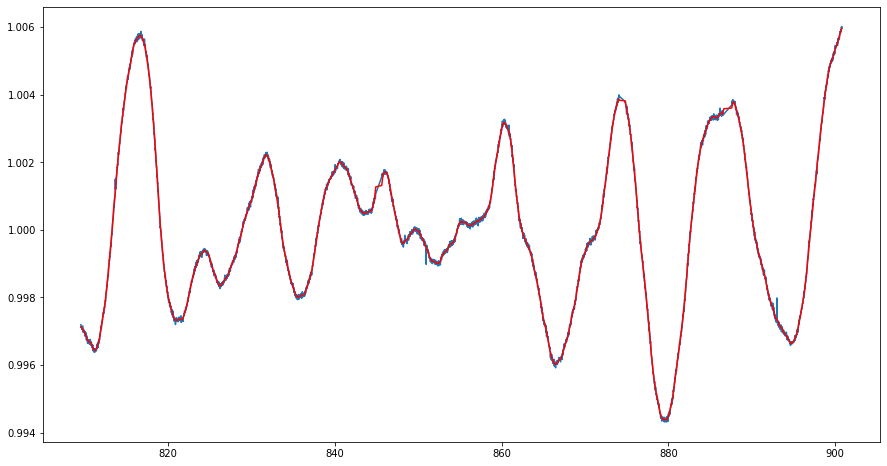

In [16]:
index = 50
ind = 250
plt.plot(time[index:-ind],flux[index:-ind])
plt.plot(time[index:-ind], smoothed_signal[index:-ind],color='red')

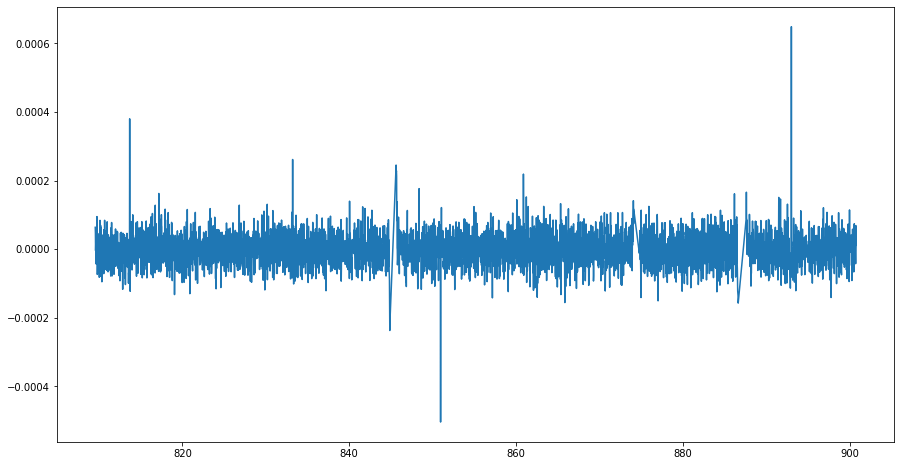

In [17]:
flkr=flux[index:-ind]-smoothed_signal[index:-ind]
plt.figure(figsize=(15,8))
plt.plot(time[index:-ind],flkr)

In [18]:
np.sqrt(np.mean(flkr**2))/1e-3

0.04844543582294136